In [43]:
from pandas import json_normalize
from urllib.request import Request, urlopen
import pandas as pd
import json
import matplotlib.pyplot as plt
from math import pi
import numpy as np

C:\Users\mkh08\AppData\Local\Temp\ipykernel_33508\1493041035.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


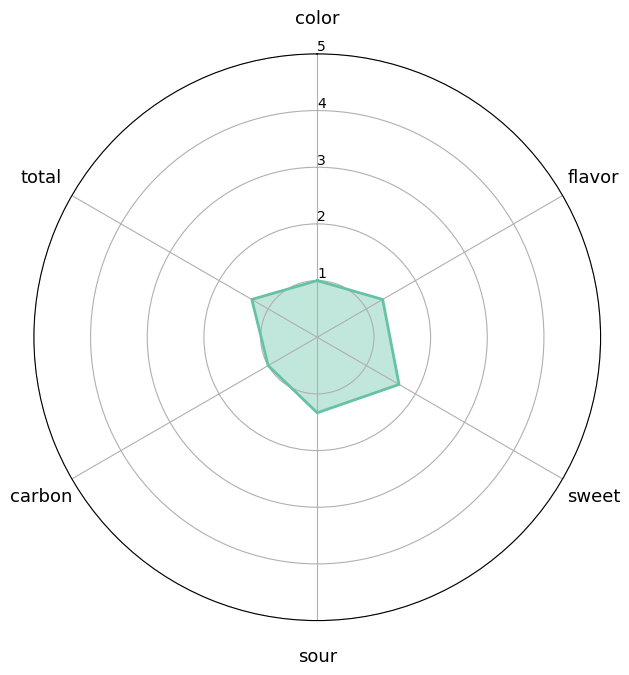

In [106]:
from pandas import json_normalize
from urllib.request import Request, urlopen
import pandas as pd
import json
import matplotlib.pyplot as plt
from math import pi

try:
    df1 = pd.DataFrame()
    api = "http://127.0.0.1:8000/api/comments/?post=0"
    response = urlopen(api)
    json_api = response.read().decode("utf-8")
    json_file = json.loads(json_api)
    json_normalized = json_normalize(json_file)
    df1 = pd.concat([df1, json_normalized])
    df2 = df1[['post','color', 'flavor', 'sweet','sour','carbon','total']]
    df3 = pd.DataFrame(df2.mean(), columns=['mean_value'])
    df3 = df3.transpose()
    df3.reset_index(inplace=True, drop=True)

    # 방사형 차트 - 하나씩 시각화

    labels = df3.columns[1:]
    num_labels = len(labels)

    # 등분점 생성    
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] 
    angles += angles[:1] # 시작점 생성
        
    my_palette = plt.cm.get_cmap("Set2", len(df3.index))
    
    fig = plt.figure(figsize=(15,20))
    fig.set_facecolor('white')
    fig.patch.set_alpha(0)

    for i, row in df3.iterrows():
        color = my_palette(i)
        data = df3.iloc[i].drop('post').tolist()
        data += data[:1]
        
        ax = plt.subplot(3,2,i+1, polar=True)
        # 시작점 설정
        ax.set_theta_offset(pi / 2)
        # 시계방향 설정
        ax.set_theta_direction(-1) 
        
        # 각도 축 눈금 생성
        plt.xticks(angles[:-1], labels, fontsize=13)
        # 각 축과 눈금 사이 여백생성
        ax.tick_params(axis='x', which='major', pad=15)
        # 반지름 축 눈금 라벨 각도 0으로 설정
        ax.set_rlabel_position(0)
        # 반지름 축 눈금 설정
        plt.yticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'], fontsize=10)
        plt.ylim(0, 5)
        
        # 방사형 차트 출력
        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
        # 도형 안쪽 색상 설정
        ax.fill(angles, data, color=color, alpha=0.4) 
        # 각 차트의 제목 생성
    # 차트 간 간격 설정 
    plt.tight_layout(pad=3) 
    plt.show()
except:
    pass

In [85]:
df2 = df1[['post', 'color', 'flavor', 'sweet','sour','carbon','total']]
df3 = pd.DataFrame(df2.mean(), columns=['mean_value'])
df3 = df3.transpose()
df3.reset_index(inplace=True, drop=True)

,post,color,flavor,sweet,sour,carbon,total
0,0.0,1.0,1.333333,1.666667,1.333333,1.0,1.333333


C:\Users\mkh08\AppData\Local\Temp\ipykernel_33508\3583100656.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


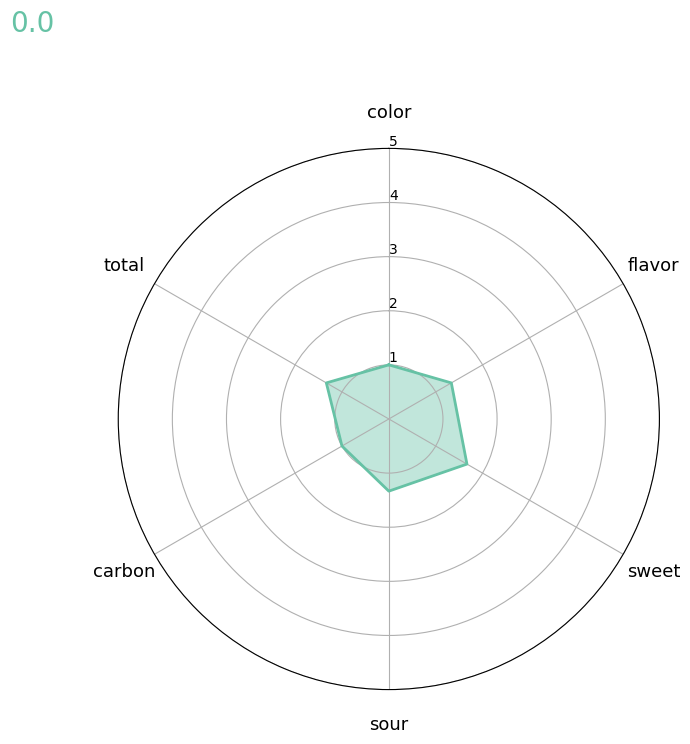

In [87]:
# 방사형 차트 - 하나씩 시각화

labels = df3.columns[1:]
num_labels = len(labels)

# 등분점 생성    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] 
angles += angles[:1] # 시작점 생성
    
my_palette = plt.cm.get_cmap("Set2", len(df3.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('post').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    # 시작점 설정
    ax.set_theta_offset(pi / 2)
    # 시계방향 설정
    ax.set_theta_direction(-1) 
    
    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)
    # 각 축과 눈금 사이 여백생성
    ax.tick_params(axis='x', which='major', pad=15)
    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)
    # 반지름 축 눈금 설정
    plt.yticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'], fontsize=10)
    plt.ylim(0, 5)
    
    # 방사형 차트 출력
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    # 도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha=0.4) 
    # 각 차트의 제목 생성
    plt.title(row.post, size=20, color=color,x=-0.2, y=1.2, ha='left') 
# 차트 간 간격 설정 
plt.tight_layout(pad=3) 
plt.show()

C:\Users\mkh08\AppData\Local\Temp\ipykernel_33508\495205243.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df2.index))


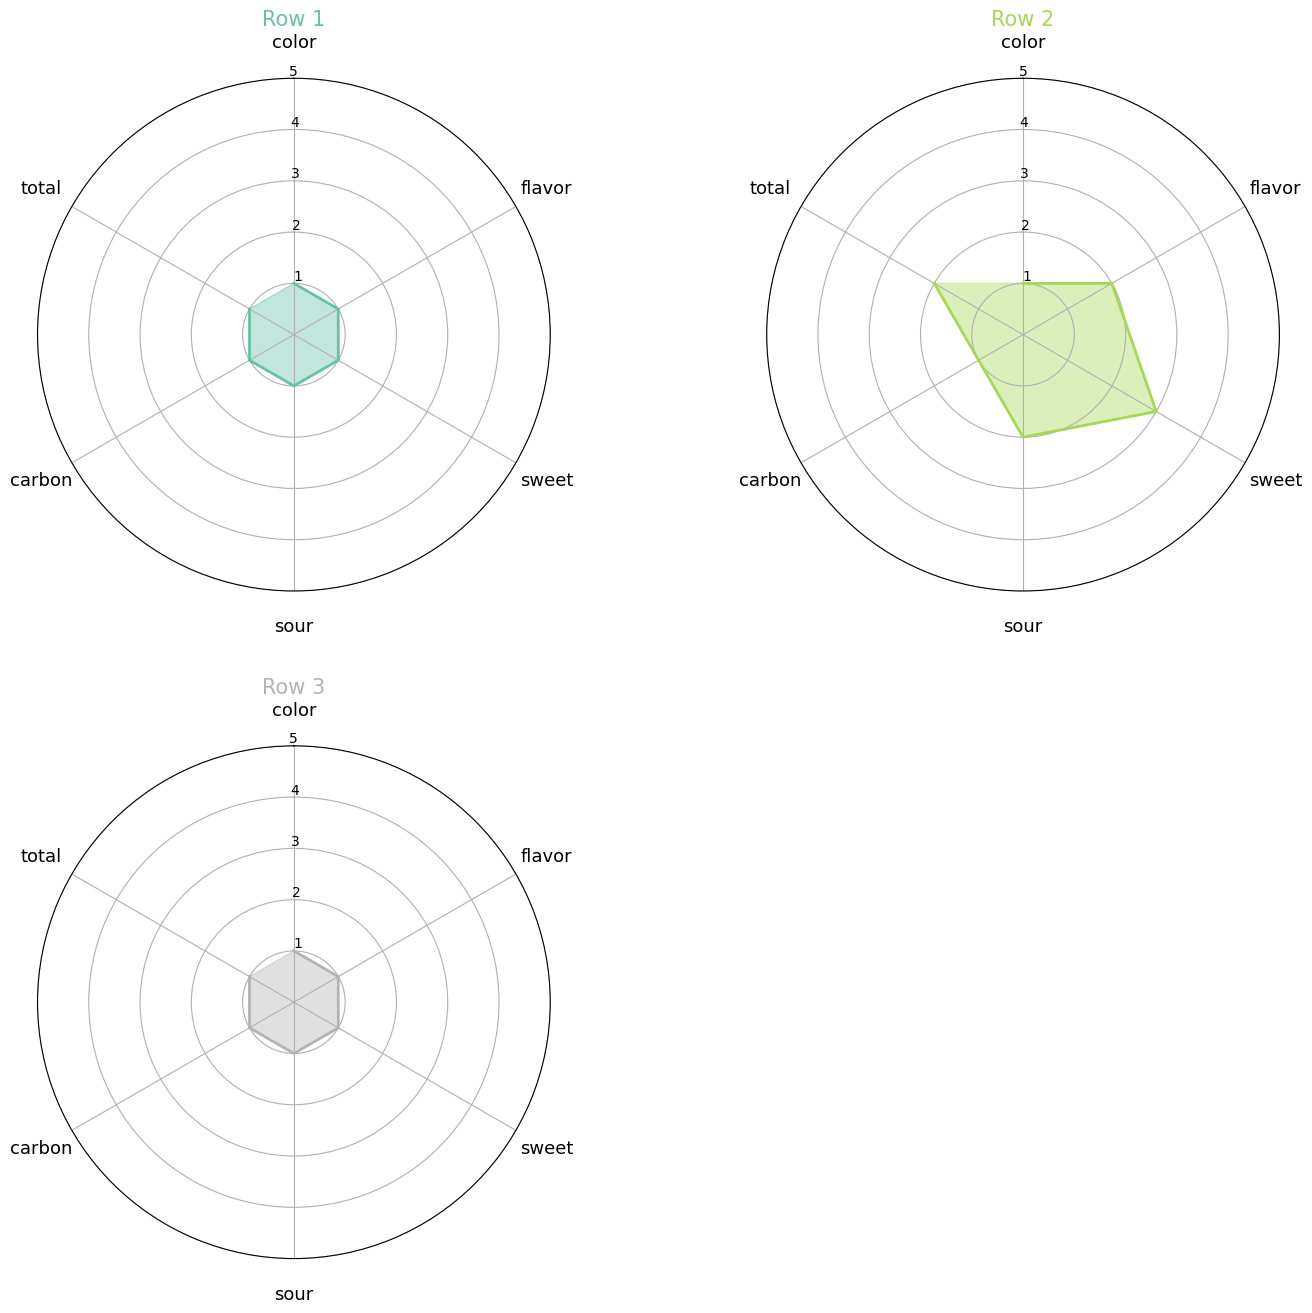

In [79]:
# 칼럼 및 레이블 설정
labels = df2.columns[1:]
num_labels = len(labels)
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] 


my_palette = plt.cm.get_cmap("Set2", len(df2.index))

fig = plt.figure(figsize=(15, 20))
fig.set_facecolor('white')

for i, row in df2.iterrows():
    color = my_palette(i)
    data =  df2.iloc[i].drop('post').tolist()
    data += data[:1]

    ax = plt.subplot(3, 2, i+1, polar=True)
    # 시작점 설정
    ax.set_theta_offset(pi / 2)
    # 시계방향 설정
    ax.set_theta_direction(-1)

    # 각도 축 눈금 생성
    plt.xticks(angles, labels, fontsize=13)
    # 각 축과 눈금 사이 여백생성
    ax.tick_params(axis='x', which='major', pad=15)
    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(-1)
    # 반지름 축 눈금 설정
    plt.yticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'], fontsize=10)
    plt.ylim(0, 5)

    # 방사형 차트 출력
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    # 도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha=0.4)
    # 각 차트의 제목 생성
    ax.set_title(f'Row {i+1}', size=15, color=color)

# 차트 간 간격 설정
plt.tight_layout(pad=3)
plt.show()

C:\Users\mkh08\AppData\Local\Temp\ipykernel_33508\296679893.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df2.index))


ValueError: x and y must have same first dimension, but have shapes (7,) and (8,)

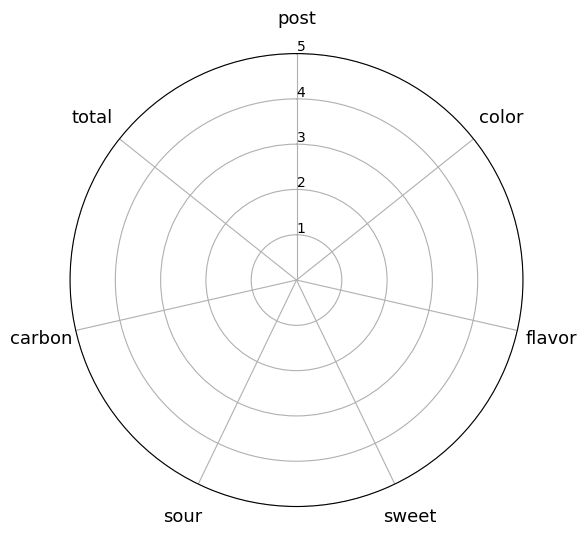

C:\Users\mkh08\AppData\Local\Temp\ipykernel_33508\969822438.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df2.index))


ValueError: x and y must have same first dimension, but have shapes (7,) and (3, 6)

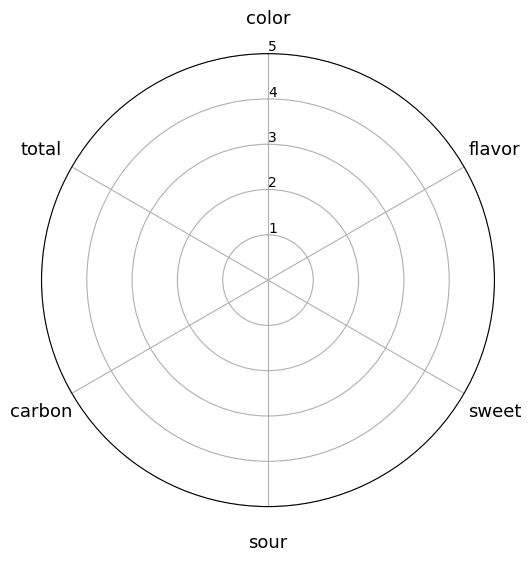

In [41]:
labels = df2.columns[0:]
num_labels = len(labels)
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] 
angles += angles[:1] 
    
my_palette = plt.cm.get_cmap("Set2", len(df2.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in df2.iterrows():
    color = my_palette(i)
    data = df2
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    # 시작점 설정
    ax.set_theta_offset(pi / 2)
    # 시계방향 설정
    ax.set_theta_direction(-1) 
    
    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)
    # 각 축과 눈금 사이 여백생성
    ax.tick_params(axis='x', which='major', pad=15)
    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)
    # 반지름 축 눈금 설정
    plt.yticks([1,2,3,4,5],['1','2','3','4','5'], fontsize=10) 
    plt.ylim(0,5)
    
    # 방사형 차트 출력
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    # 도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha=0.4) 
    # 각 차트의 제목 생성
# 차트 간 간격 설정 
plt.tight_layout(pad=3) 
plt.show()

In [2]:


apikey= "SDqWmmlSMlsBobBnB0DwlV9IVwFkxNwn42%2BKrK%2F5WMV0AxecYPKMJ2tAurfLvCGOt2hvyBLvi9oG7R%2Bn%2FG4ZUA%3D%3D" #민경환 개인키
df = pd.DataFrame()
for page in range(1, 852):
    api=f"https://api.odcloud.kr/api/15048755/v1/uddi:fec53d3a-2bef-4494-b50e-f4e566f403e0?page={page}&perPage=100&serviceKey={apikey}"
    response = urlopen(api)
    json_api = response.read().decode("utf-8")
    json_file = json.loads(json_api)
    json_data = json_file['data']
    json_normalized = json_normalize(json_data)
    df = pd.concat([df, json_normalized])
    
df.to_csv('전통주_API_DATA.csv', index=False, encoding='utf-8-sig')

KeyboardInterrupt: 